<a href="https://colab.research.google.com/github/quangnhat1395/MLEF1/blob/master/numpy_matplotlib_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#numpy_matplotlib_pandas

The numpy and matplotlib sections of this tutorial was originally written by [Justin Johnson](https://web.eecs.umich.edu/~justincj/) for cs231n. It was adapted as a Jupyter notebook for cs228 by [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) and [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335). It runs Python3 by default.

##Introduction

Some of you may have previous knowledge in Matlab, in which case we also recommend the numpy for Matlab users page (https://docs.scipy.org/doc/numpy-dev/user/numpy-for-matlab-users.html).

In this tutorial, we will cover:

* Numpy: Arrays, Array indexing, Datatypes, Array math, Broadcasting
* Matplotlib: Plotting, Subplots, Images
* Pandas: Data frame, Basic pandas functionality (index, filter, sort, etc.), Data filtering, groupby, and data aggregation, Data analyse example

##Numpy

Numpy is the core library for scientific computing in Python. It provides a high-performance multidimensional array object, and tools for working with these arrays. If you are already familiar with MATLAB, you might find this [tutorial](http://wiki.scipy.org/NumPy_for_Matlab_Users) useful to get started with Numpy.

To use Numpy, we first need to import the `numpy` package:

In [ ]:
import numpy as np

###Arrays

A numpy array is a grid of values, all of the same type, and is indexed by a tuple of nonnegative integers. The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

We can initialize numpy arrays from nested Python lists, and access elements using square brackets:

In [ ]:
a = np.array([1, 2, 3])  # Create a rank 1 array
print(type(a), a.shape, a[0], a[1], a[2])
a[0] = 5                 # Change an element of the array
print(a)                  

<class 'numpy.ndarray'> (3,) 1 2 3
[5 2 3]


In [ ]:
b = np.array([[1,2,3],[4,5,6]]) # Create a rank 2 array
print(b.shape)
print(b)

(2, 3)
[[1 2 3]
 [4 5 6]]


In [ ]:
# Array Indexing
#Indexing a rank 2 array could be written in two different ways 
# (and there are many to come in the section below)
print(b[0, 0], b[0, 1], b[1, 0]) 
print(b[0][0], b[0][1], b[1][0])

1 2 4
1 2 4


In [ ]:
c = np.array([[[1,2,3], [4,5,6]], [[7,8,9], [10, 11, 12]]]) # Create a rank 3 array
print(c.shape)
print(c)

(2, 2, 3)
[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [ ]:
# Indexing a rank 3 array is pretty similar to that of rank 2 array
print(c[0, 0, 0], c[0, 1, 0], c[1, 0, 1]) 
print(c[0][0][0], c[0][1][0], c[1][0][1])

1 4 8
1 4 8


Numpy also provides many functions to create arrays:

In [ ]:
a = np.zeros((2,2))  # Create an array of all zeros
print(a)

[[0. 0.]
 [0. 0.]]


In [ ]:
b = np.ones((1,2))   # Create an array of all ones
print(b)

[[1. 1.]]


In [ ]:
c = np.full((2,2), 7) # Create a constant array
print(c)

[[7 7]
 [7 7]]


In [ ]:
d = np.eye(2)        # Create a 2x2 identity matrix
print(d)

[[1. 0.]
 [0. 1.]]


In [ ]:
e = np.random.random((2,2)) # Create an array filled with random values
print(e)

[[0.86679868 0.46266196]
 [0.87642044 0.00682859]]


###Array indexing

Numpy offers several ways to index into arrays.

Slicing: Similar to Python lists, numpy arrays can be sliced. Since arrays may be multidimensional, you must specify a slice for each dimension of the array:

In [ ]:
# Create the following rank 2 array with shape (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Use slicing to pull out the subarray consisting of the first 2 rows
# and columns 1 and 2; b is the following array of shape (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)

[[2 3]
 [6 7]]


A slice of an array is a view into the same data, so modifying it will modify the original array.

In [ ]:
print(a[0, 1])
b[0, 0] = 77    # b[0, 0] is the same piece of data as a[0, 1]
print(a[0, 1]) 

2
77


You can also mix integer indexing with slice indexing. However, doing so will yield an array of lower rank than the original array. Note that this is quite different from the way that MATLAB handles array slicing:

In [ ]:
# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Two ways of accessing the data in the middle row of the array.
Mixing integer indexing with slices yields an array of lower rank,
while using only slices yields an array of the same rank as the
original array:

In [ ]:
row_r1 = a[1, :]    # Rank 1 view of the second row of a (mix integer indexing with slices)
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a (using only slices)
row_r3 = a[[1], :]  # Rank 2 view of the second row of a (using only slices)
print(row_r1, row_r1.shape, "lower rank than the original array")
print(row_r2, row_r2.shape, "same rank as the original array")
print(row_r3, row_r3.shape, "same rank as the original array")

[5 6 7 8] (4,) lower rank than the original array
[[5 6 7 8]] (1, 4) same rank as the original array
[[5 6 7 8]] (1, 4) same rank as the original array


In [ ]:
# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)
print()
print(col_r2, col_r2.shape)

[ 2  6 10] (3,)

[[ 2]
 [ 6]
 [10]] (3, 1)


Integer array indexing: When you index into numpy arrays using slicing, the resulting array view will always be a subarray of the original array. In contrast, integer array indexing allows you to construct arbitrary arrays using the data from another array. Here is an example:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

# An example of integer array indexing.
# The returned array will have shape (3,) and 
print(a[[0, 1, 2], [0, 1, 0]])

# The above example of integer array indexing is equivalent to this:
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))

[1 4 5]
[1 4 5]


In [ ]:
# When using integer array indexing, you can reuse the same
# element from the source array:
print(a[[0, 0], [1, 1]])

# Equivalent to the previous integer array indexing example
print(np.array([a[0, 1], a[0, 1]]))

[2 2]
[2 2]


One useful trick with integer array indexing is selecting or mutating one element from each row of a matrix:

In [ ]:
# Create a new array from which we will select elements
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print(a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# Create an array of indices
b = np.array([0, 2, 0, 1])

# Select one element from each row of a using the indices in b
print(a[np.arange(4), b])  # Prints "[ 1  6  7 11]"

[ 1  6  7 11]


In [ ]:
# Mutate one element from each row of a using the indices in b
a[np.arange(4), b] += 10
print(a)

[[11  2  3]
 [ 4  5 16]
 [17  8  9]
 [10 21 12]]


Boolean array indexing: Boolean array indexing lets you pick out arbitrary elements of an array. Frequently this type of indexing is used to select the elements of an array that satisfy some condition. Here is an example:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Find the elements of a that are bigger than 2;
                    # this returns a numpy array of Booleans of the same
                    # shape as a, where each slot of bool_idx tells
                    # whether that element of a is > 2.

print(bool_idx)

[[False False]
 [ True  True]
 [ True  True]]


In [ ]:
# We use boolean array indexing to construct a rank 1 array
# consisting of the elements of a corresponding to the True values
# of bool_idx
print(a[bool_idx])

# We can do all of the above in a single concise statement:
print(a[a > 2])

[3 4 5 6]
[3 4 5 6]


For brevity we have left out a lot of details about numpy array indexing; if you want to know more you should read the documentation.

###Datatypes

Every numpy array is a grid of elements of the same type. Numpy provides a large set of numeric datatypes that you can use to construct arrays. Numpy tries to guess a datatype when you create an array, but functions that construct arrays usually also include an optional argument to explicitly specify the datatype. Here is an example:

In [ ]:
x = np.array([1, 2])  # Let numpy choose the datatype
y = np.array([1.0, 2.0])  # Let numpy choose the datatype
z = np.array([1, 2], dtype=np.int64)  # Force a particular datatype

print(x.dtype, y.dtype, z.dtype)

int64 float64 int64


You can read all about numpy datatypes in the [documentation](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

###Array math

Basic mathematical functions operate elementwise on arrays, and are available both as operator overloads and as functions in the numpy module:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Elementwise sum; both produce the array
print(x + y)
print(np.add(x, y))

[[ 6.  8.]
 [10. 12.]]
[[ 6.  8.]
 [10. 12.]]


In [ ]:
# Elementwise difference; both produce the array
print(x - y)
print(np.subtract(x, y))

[[-4. -4.]
 [-4. -4.]]
[[-4. -4.]
 [-4. -4.]]


In [ ]:
# Elementwise product; both produce the array
print(x * y)
print(np.multiply(x, y))

[[ 5. 12.]
 [21. 32.]]
[[ 5. 12.]
 [21. 32.]]


In [ ]:
# Elementwise division; both produce the array
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

[[0.2        0.33333333]
 [0.42857143 0.5       ]]
[[0.2        0.33333333]
 [0.42857143 0.5       ]]


In [ ]:
# Elementwise square root; produces the array
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

[[1.         1.41421356]
 [1.73205081 2.        ]]


Note that unlike MATLAB, `*` is elementwise multiplication, not matrix multiplication. We instead use the dot function to compute inner products of vectors, to multiply a vector by a matrix, and to multiply matrices. dot is available both as a function in the numpy module and as an instance method of array objects:

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Inner product of vectors; both produce 219
print(v.dot(w))
print(np.dot(v, w))

219
219


You can also use the `@` operator which is equivalent to numpy's `dot` operator.

In [ ]:
print(v @ w)

219


In [ ]:
# Matrix / vector product; both produce the rank 1 array [29 67]
print(x.dot(v))
print(np.dot(x, v))
print(x @ v)

[29 67]
[29 67]
[29 67]


In [ ]:
# Matrix / matrix product; both produce the rank 2 array
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

[[19 22]
 [43 50]]
[[19 22]
 [43 50]]
[[19 22]
 [43 50]]


Numpy provides many useful functions for performing computations on arrays; one of the most useful is `sum`:

In [ ]:
x = np.array([[1,2],[3,4]])

print(np.sum(x))  # Compute sum of all elements; prints "10"
print(np.sum(x, axis=0))  # Compute sum of each column; prints "[4 6]"
print(np.sum(x, axis=1))  # Compute sum of each row; prints "[3 7]"

10
[4 6]
[3 7]


You can find the full list of mathematical functions provided by numpy in the [documentation](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

Apart from computing mathematical functions using arrays, we frequently need to reshape or otherwise manipulate data in arrays. The simplest example of this type of operation is transposing a matrix; to transpose a matrix, simply use the T attribute of an array object:

In [ ]:
print(x)
print("transpose\n", x.T)

[[1 2]
 [3 4]]
transpose
 [[1 3]
 [2 4]]


In [ ]:
v = np.array([[1,2,3]])
print(v )
print("transpose\n", v.T)

[[1 2 3]]
transpose
 [[1]
 [2]
 [3]]


###Broadcasting

Broadcasting is a powerful mechanism that allows numpy to work with arrays of different shapes when performing arithmetic operations. Frequently we have a smaller array and a larger array, and we want to use the smaller array multiple times to perform some operation on the larger array.

For example, suppose that we want to add a constant vector to each row of a matrix. We could do it like this:

In [ ]:
# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Create an empty matrix with the same shape as x

# Add the vector v to each row of the matrix x with an explicit loop
for i in range(4):
    y[i, :] = x[i, :] + v

print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


This works; however when the matrix `x` is very large, computing an explicit loop in Python could be slow. Note that adding the vector v to each row of the matrix `x` is equivalent to forming a matrix `vv` by stacking multiple copies of `v` vertically, then performing elementwise summation of `x` and `vv`. We could implement this approach like this:

In [ ]:
vv = np.tile(v, (4, 1))  # Stack 4 copies of v on top of each other
print(vv)                # Prints "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

[[1 0 1]
 [1 0 1]
 [1 0 1]
 [1 0 1]]


In [ ]:
y = x + vv  # Add x and vv elementwise
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


Numpy broadcasting allows us to perform this computation without actually creating multiple copies of v. Consider this version, using broadcasting:

In [ ]:
import numpy as np

# We will add the vector v to each row of the matrix x,
# storing the result in the matrix y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Add v to each row of x using broadcasting
print(y)

[[ 2  2  4]
 [ 5  5  7]
 [ 8  8 10]
 [11 11 13]]


The line `y = x + v` works even though `x` has shape `(4, 3)` and `v` has shape `(3,)` due to broadcasting; this line works as if v actually had shape `(4, 3)`, where each row was a copy of `v`, and the sum was performed elementwise.

Broadcasting two arrays together follows these rules:

1. If the arrays do not have the same rank, prepend the shape of the lower rank array with 1s until both shapes have the same length.
2. The two arrays are said to be compatible in a dimension if they have the same size in the dimension, or if one of the arrays has size 1 in that dimension.
3. The arrays can be broadcast together if they are compatible in all dimensions.
4. After broadcasting, each array behaves as if it had shape equal to the elementwise maximum of shapes of the two input arrays.
5. In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension

If this explanation does not make sense, try reading the explanation from the [documentation](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) or this [explanation](http://wiki.scipy.org/EricsBroadcastingDoc).

Functions that support broadcasting are known as universal functions. You can find the list of all universal functions in the [documentation](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Here are some applications of broadcasting:

In [ ]:
# Compute outer product of vectors
v = np.array([1,2,3])  # v has shape (3,)
w = np.array([4,5])    # w has shape (2,)
# To compute an outer product, we first reshape v to be a column
# vector of shape (3, 1); we can then broadcast it against w to yield
# an output of shape (3, 2), which is the outer product of v and w:

print(np.reshape(v, (3, 1)) * w)

[[ 4  5]
 [ 8 10]
 [12 15]]


In [ ]:
# Add a vector to each row of a matrix
x = np.array([[1,2,3], [4,5,6]])
# x has shape (2, 3) and v has shape (3,) so they broadcast to (2, 3),
# giving the following matrix:

print(x + v)

[[2 4 6]
 [5 7 9]]


In [ ]:
# Add a vector to each column of a matrix
# x has shape (2, 3) and w has shape (2,).
# If we transpose x then it has shape (3, 2) and can be broadcast
# against w to yield a result of shape (3, 2); transposing this result
# yields the final result of shape (2, 3) which is the matrix x with
# the vector w added to each column. Gives the following matrix:

print((x.T + w).T)

[[ 5  6  7]
 [ 9 10 11]]


In [ ]:
# Another solution is to reshape w to be a row vector of shape (2, 1);
# we can then broadcast it directly against x to produce the same
# output.
print(x + np.reshape(w, (2, 1)))

[[ 5  6  7]
 [ 9 10 11]]


In [ ]:
# Multiply a matrix by a constant:
# x has shape (2, 3). Numpy treats scalars as arrays of shape ();
# these can be broadcast together to shape (2, 3), producing the
# following array:
print(x * 2)

[[ 2  4  6]
 [ 8 10 12]]


Broadcasting typically makes your code more concise and faster, so you should strive to use it where possible.

This brief overview has touched on many of the important things that you need to know about numpy, but is far from complete. Check out the [numpy reference](http://docs.scipy.org/doc/numpy/reference/) to find out much more about numpy.

##Matplotlib

Matplotlib is a plotting library. In this section give a brief introduction to the `matplotlib.pyplot` module, which provides a plotting system similar to that of MATLAB.

In [ ]:
import matplotlib.pyplot as plt

By running this special iPython command, we will be displaying plots inline:

In [ ]:
%matplotlib inline

###Plotting

The most important function in `matplotlib` is plot, which allows you to plot 2D data. Here is a simple example:

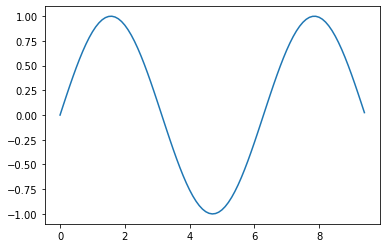

In [ ]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)

With just a little bit of extra work we can easily plot multiple lines at once, and add a title, legend, and axis labels:

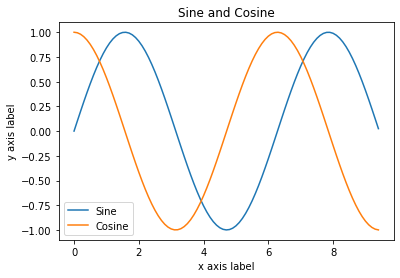

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

###Subplots 

You can plot different things in the same figure using the subplot function. Here is an example:

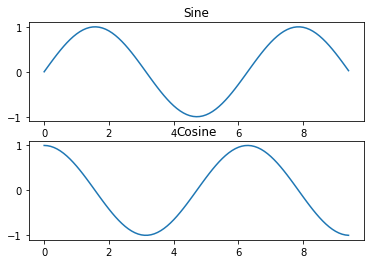

In [ ]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

You can read much more about the `subplot` function in the [documentation](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

##Pandas

**Import the package**

In [ ]:
import pandas as pd

###DataFrame

**Create a simple DataFrame**

- syntax: pd.DataFrame({column1 : value1, column2 : value2, column3 : value3})

You can have anything as column names and anything as values.

The only requirement is to have all value lists being of equal length (all are of length 3 in this example)

There are many ways to create a data frame. All of them can be seen documented [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

In [ ]:
df00 = pd.DataFrame({'name':['Bob','Jen','Tim'],
                   'age':[20,30,40],
                   'hobby':['tennis', 'swimming', 'golf']})

df00

,name,age,hobby
0,Bob,20,tennis
1,Jen,30,swimming
2,Tim,40,golf


**View the column names and index values**

The index is one of the most important concepts in pandas. 

Each dataframe has only a single index which is always available as `df.index` and if you do not supply one (as we did not for this dataframe) a new one is made automatically. 

Indexes define how to access rows of the dataframe. 

The simplest index is the range index but there are more complex ones like interval index, datetime index and multi index. 

In [ ]:
print(df00.columns)
print(df00.index)

Index(['name', 'age', 'hobby'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


**Select multiple columns**

To select multiple columns we use `df[columns_to_select]` where `columns_to_select` are the columns we are interested in given as a simple python list. As the result we will get another data frame. 

This is the equivalent of listing columns names in `SELECT` part of a sql query.

In [ ]:
df00[['name','hobby']]

,name,hobby
0,Bob,tennis
1,Jen,swimming
2,Tim,golf


**Select a row by index**

Regular selection of rows goes via its index. When using range indices we can access rows using integer indices but this will not work when using datetime index for example.

We can always access any row in the dataframe using `.iloc[i]` for some integer i. 

The result is a series object from which we can access values by using column indexing.

In [ ]:
df00.iloc[0]

name        Bob
age          20
hobby    tennis
Name: 0, dtype: object

You can also select multiple rows using index slicing

In [ ]:
df00.iloc[1:]

,name,age,hobby
1,Jen,30,swimming
2,Tim,40,golf


Everything we discussed about indexing in numpy arrays applies to dataframes as well.

DataFrames are very similar to 2d-arrays with the main exception being that in DataFrames you can index using strings (column names).

**Difference between loc and iloc**

- `.loc` selection is based on the value of the index. For example if the index was categorical we could index via some category. 
- `.iloc` selection is **always** based on integer positions. When using iloc we are treating the dataframe as 2d-array with no special structure compared to the case of `.loc`

In [ ]:
df00.loc[0] #index based

name        Bob
age          20
hobby    tennis
Name: 0, dtype: object

In [ ]:
df00.iloc[0] #relative position based indexing

name        Bob
age          20
hobby    tennis
Name: 0, dtype: object

In [ ]:
df00.iloc[-1,:] #Use iloc to select the last row

name      Tim
age        40
hobby    golf
Name: 2, dtype: object

###Basic Functionality

**Sort Function**

- pandas.pydata.org
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html

**Sort the data by hobby**

There are two ways to sort.
- By index
- By value

By value means sorting according to value in a column. 

In this example we sort the rows of the dataframe based on values in 'hobby' column.

The parameter `ascending = True` means that we want the rows sorted in ascending order. This is the same as sql 'ASC'. To get descending order use `ascending = False`.

`inplace` is very important and you should always remember it. When `inplace=True` the dataframe is modified in place which means that no copies are made and your previous data stored in the dataframe is lost. By default inplace is always False. When it is false a copy is made of your data and that copy is sorted and returned as output. 

The output of `sort_values` is always a dataframe returned but the behaviour depends strongly on the `inplace` parameter.

In [ ]:
df00.sort_values('hobby', ascending=True) #output return a dataframe


,name,age,hobby
2,Tim,40,golf
1,Jen,30,swimming
0,Bob,20,tennis


In [ ]:
df00 #but the original dataframe was unchanged

,name,age,hobby
0,Bob,20,tennis
1,Jen,30,swimming
2,Tim,40,golf


In [ ]:
df00.sort_values('hobby',inplace=True, ascending=True) # set (inplace = True) would modify directly on df00

In [ ]:
df00

,name,age,hobby
2,Tim,40,golf
1,Jen,30,swimming
0,Bob,20,tennis


**Importing Data**

Scikit-learn package provides some toy datasets. You could read more in the following link

https://scikit-learn.org/stable/datasets/index.html

Importing a dataset from scikit-learn is pretty simple

In [ ]:
from sklearn.datasets import load_iris
iris_dataset = load_iris() #Load a dictionary containing many information about the iris dataset

In [ ]:
print("Keys of iris_dataset:\n", iris_dataset.keys()) #Read the key from the dictionary 

Keys of iris_dataset:
 dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


We will explore each key below

In [ ]:
print(iris_dataset['DESCR'][:193] + "\n...") #DESCR is the description of the dataset

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [ ]:
print("Target names:", iris_dataset['target_names']) #Target names give us the name of the flower classes in the iris dataset

Target names: ['setosa' 'versicolor' 'virginica']


In [ ]:
print("Feature names:\n", iris_dataset['feature_names']) 

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [ ]:
print("Type of data:", type(iris_dataset['data'])) 

Type of data: <class 'numpy.ndarray'>


In [ ]:
print("Shape of data:", iris_dataset['data'].shape)

Shape of data: (150, 4)


In [ ]:
print("First five rows of data:\n", iris_dataset['data'][:5])

First five rows of data:
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [ ]:
print("Type of target:", type(iris_dataset['target']))

Type of target: <class 'numpy.ndarray'>


In [ ]:
print("Shape of target:", iris_dataset['target'].shape)

Shape of target: (150,)


In [ ]:
print("Target:\n", iris_dataset['target'])

Target:
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


Let's create a pandas dataframe from the iris dataset. 

Since the features and target are written in two seperate arrays, we will need to use function np.c_ to concatenate them as follow

In [ ]:
iris_data = np.c_[iris_dataset['data'], iris_dataset['target']]
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2, 0. ],
       [4.9, 3. , 1.4, 0.2, 0. ],
       [4.7, 3.2, 1.3, 0.2, 0. ],
       [4.6, 3.1, 1.5, 0.2, 0. ],
       [5. , 3.6, 1.4, 0.2, 0. ]])

In [ ]:
df_iris = pd.DataFrame(iris_data, columns=iris_dataset['feature_names'] + ['target'])


In practice, it's better to avoid spaces and other special characters (e.g. brackets `()`, `{}`, `[]`; dots `.`; slashes `\` `/`; etc.) in the column name. The reason will be made clear later.

To change the name of the columns, we could use .rename()

In [ ]:
df_iris.rename(columns={"sepal length (cm)":"sepal_length_cm", "sepal width (cm)":"sepal_width_cm", "petal length (cm)":"petal_length_cm", "petal width (cm)":"petal_width_cm"}, inplace=True)
df_iris.head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


 **Investigate the first few rows of data**

The `head` method by default prints the first 5 rows of your dataframe.

If you pass it a parameter `n` it will print first `n` rows. 

The docs are [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.head.html)

In [ ]:
df_iris.head() #show only the first 5 rows 

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
df_iris.head(2) #show only the first 2 rows 

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0


**Investigate the last 10 rows of data**

tail is similar to head except it prints the last `n` rows.

In [ ]:
df_iris.tail()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0
149,5.9,3.0,5.1,1.8,2.0


**Investigate the data types in the DataFrame**

This method will tell you the types of columns.

Types are automatically inferred by pandas and usually you do not have to worry about them.

[docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.info.html)

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   target           150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


You can also change the datatype of a column using astype()

In [ ]:
df_iris['target'] = df_iris['target'].astype('int')

In [ ]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length_cm  150 non-null    float64
 1   sepal_width_cm   150 non-null    float64
 2   petal_length_cm  150 non-null    float64
 3   petal_width_cm   150 non-null    float64
 4   target           150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


**Get some summary statistics**

To learn more about describe visit [this link](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [ ]:
df_iris.describe()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


**Look at your data**

We could plot a quick summary of our data.

Here we use pandas plotting function scatter_matrix. For more information on how create plots in pandas, please refer to the following tutorial

https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f42e7263dd8>,
      dtype=object)

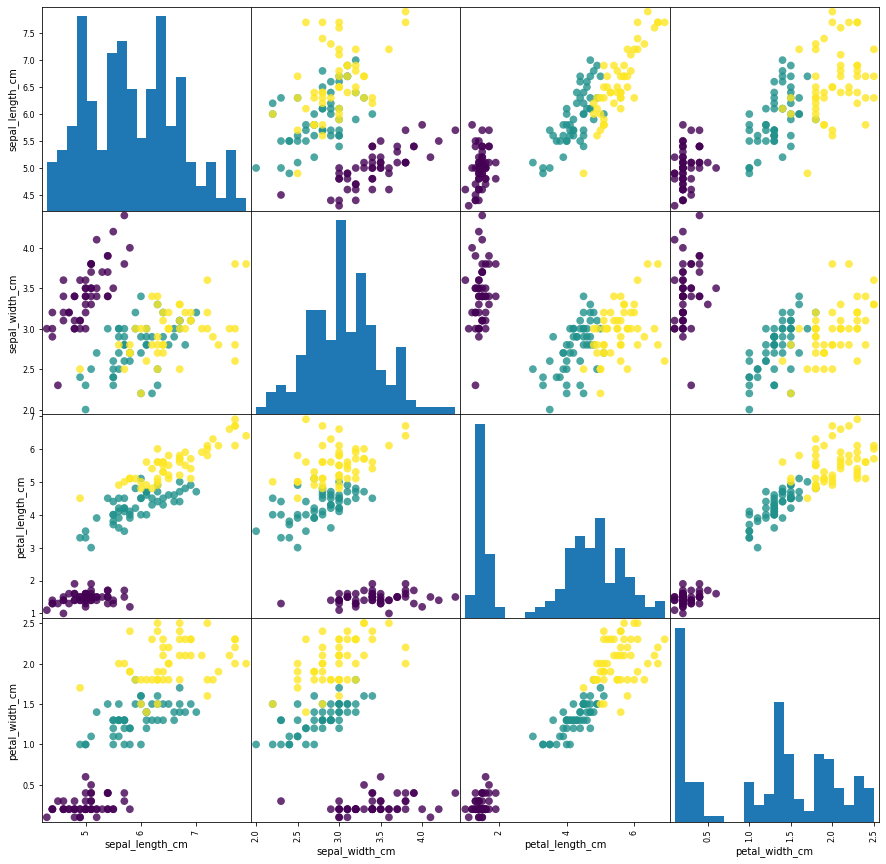

In [ ]:
# create dataframe containing only feature columns
# label the columns using the strings in iris_dataset.feature_names
iris_dataframe = df_iris.drop('target', axis=1) #we could use .drop() to drop the target column only
# create a scatter matrix from the dataframe, color by y_train
pd.plotting.scatter_matrix(iris_dataframe, c=df_iris.target, figsize=(15, 15),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8)

### Filtering

You can filter data based on the columns and values in the dataframe

**Filter the data for Setosa (target=0)**

There are two pieces of the puzzle here:
- `df_iris.target==0` will give a boolean array where True means that row has the `target` column with value 0. This numpy array is called the predicate.
- `df_iris[df_iris.target==0]` will give back all rows for which the predicate holds true.

The result of this filter is a dataframe with same columns as the input dataframe.

In [ ]:
df_iris[df_iris.target==0].head()

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


**Filter the sepal length for the Setosa**

Again there are two important parts:
- `df_iris.target==0` is the predicate as before
- `df_iris.sepal_length_cm` means taking the values for the sepal length column, and `df_iris.sepal_length_cm[df_iris.target==0]` means taking all sepal lengths which are related to Setosa rows.

The result of this is pandas series **not** a dataframe.

In [ ]:
df_iris.sepal_length_cm[df_iris.target==0]

0     5.1
1     4.9
2     4.7
3     4.6
4     5.0
5     5.4
6     4.6
7     5.0
8     4.4
9     4.9
10    5.4
11    4.8
12    4.8
13    4.3
14    5.8
15    5.7
16    5.4
17    5.1
18    5.7
19    5.1
20    5.4
21    5.1
22    4.6
23    5.1
24    4.8
25    5.0
26    5.0
27    5.2
28    5.2
29    4.7
30    4.8
31    5.4
32    5.2
33    5.5
34    4.9
35    5.0
36    5.5
37    4.9
38    4.4
39    5.1
40    5.0
41    4.5
42    4.4
43    5.0
44    5.1
45    4.8
46    5.1
47    4.6
48    5.3
49    5.0
Name: sepal_length_cm, dtype: float64

###Groupby and Aggregation

**Adding methods to filters**

A method is a function and is used frequently when analyzing data in Pandas. There are countless Pandas methods. We'll go over a few of the basic ones to show how you can use methods to quickly analyze your data.

**How many Setosa (target=0) and Virginica (target=2) samples were there in the iris dataset?**

The pipeline always goes the same way
- Predicate is evalatued
- Data is filtered according to a predicate
- An aggregate value is computed after the filtering.

The count method simply counts the number of frames in the dataframe.

In [ ]:
df_iris.target[df_iris.target==0].count()


50

In [ ]:
df_iris.target[df_iris.target==2].count()


50

**What was the average sepal length for Setosa with sepal width greater than 3.4 (cm)**

Here we combine predicates using the and operator (&).

This operator applies the logical and operation between elements at matching positions.

For example: 
- x = np.array([True, False, True, True]) 
- y = np.array([False, True, False, True])
- will give x & y = np.array([True & False, False & True, True & False, True & True]).

In the following example we use the or combiner (|).

You can combine any two boolean numpy arrays as long as they have the same shape using the & and | operators.

Combining regular python lists this way does not work.

In [ ]:
df_iris.sepal_length_cm[(df_iris.target==0) & (df_iris.sepal_width_cm>=3.4)].mean()

5.17741935483871

**What was the average sepal length for Versicolor and Virginica?**

The mean method is the same as AVERAGE in SQL.

In [ ]:
df_iris.sepal_length_cm[(df_iris.target==1)|(df_iris.target==2)].mean()

6.261999999999998

We notice that this is equivalent to the average sepal length of other species except Setosa

In [ ]:
df_iris.sepal_length_cm[df_iris.target!=0].mean()

6.261999999999998

**Use groupby to compare the average sepal length of the three iris species**

The `groupby` method is one of the most important tools you will use in your day to day work.

It's main input parameter is either a string denoting a column name or a list of strings denoting a list of column names.

It's output is a GroupBy object which is very similar to a dataframe.

The operation of groupby is the same as SQL GROUPBY.

For more info see the [docs](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html).

In [ ]:
df_iris.groupby('target')['sepal_length_cm'].mean()

target
0    5.006
1    5.936
2    6.588
Name: sepal_length_cm, dtype: float64

**Create a DataFrame with groupby** 

When we want to compare different statistics among the iris species, we could create a new dataframe using groupby and apply the aggregate functions.

There are many aggregate functions for groupby; the most common are mean, sum, count, max, min, and std.

You can find a list of aggregate functions [here](https://pandas.pydata.org/docs/user_guide/computation.html#id1).



In [ ]:
new00 = df_iris.groupby('target')[['sepal_length_cm','petal_width_cm']].mean()
new00

,sepal_length_cm,petal_width_cm
target,,
0,5.006,0.246
1,5.936,1.326
2,6.588,2.026


We could apply multiple aggreate functions to a single column by passing a dictionary with the format `{column_name: sequence of aggregate functions}`

In [ ]:
new01 = df_iris.groupby('target').agg({'sepal_length_cm':['mean', 'min', 'max', 'std'], 'sepal_width_cm':['mean', 'min', 'max', 'std']})
new01

sepal_length_cm                     sepal_width_cm                    
                  mean  min  max       std           mean  min  max       std
target                                                                       
0                5.006  4.3  5.8  0.352490          3.428  2.3  4.4  0.379064
1                5.936  4.9  7.0  0.516171          2.770  2.0  3.4  0.313798
2                6.588  4.9  7.9  0.635880          2.974  2.2  3.8  0.322497